![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

### 2. Preparación de datos

Una vez entendido el contexto de la problemática y realizado el análisis exploratorio de datos de acuerdo con la descripción del dataset y la información entregada al equipo en la fase anterior, se comparte un paso a paso que deberá ser diligenciado por el equipo de ciencia de datos asignado para esta tarea con el fin de guiar el proceso de EDA y preparación de datos, lo cual es crucial antes de desarollar el modelamiento. 

El estudio tiene como objetivo la clasificación de un paciente como hospitalizado o no hospitalizado.




Carguen la base de datos y revisen el tipo de cada columna del dataset. Si es necesario realicen conversiones de tipos de datos. 

In [168]:
import pandas as pd
import numpy as np

In [169]:
data = pd.read_csv("BBDD_Hospitalización_CSV.csv")

In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    float64
 1   DIABETES                                                                   568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    object 
 3   PSA                                                                        564 non-null    object 
 4   BIOPSIAS PREVIAS                                                           566 non-null    object 
 5   VOLUMEN PROSTATICO                                                         567 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

In [171]:
data.head()

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,"7,7",NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0


In [172]:
#Vemos los valores distintos de EDAD
distinct_values_edad = data.EDAD.unique()
print(distinct_values_edad)

[ 53.  56.  57.  55.  67.  69.  44.  54.  68.  43.  65.  62.  71.  64.
  77.  75.  73.  63.  66.  84.  42.  61.  47.  48.  49.  81.  52.  74.
  70.  58.  59.  60.  50. 143. 151.  76.  78.  46.  51.  79.  39.  72.
  80.  45.  82.  nan]


In [173]:
#Reemplace los valores outliers por un valor mas razonable de edad.
data["EDAD"] = data["EDAD"].replace(143, 43)
data["EDAD"] = data["EDAD"].replace(151, 51)

In [174]:
#Reemplazo los valores nulos por en promedio de edad.
edad_promedio = data['EDAD'].mean()
data['EDAD'].fillna(edad_promedio, inplace=True)

In [175]:
#Reemplazo el valor de , por . para que me lo tome como float.
data.PSA = data.PSA.str.replace(',', '.')

In [176]:
#Vemos los valores distintos de NUMERO DE MUESTRAS TOMADAS
distinct_values_numMuestras = data["NUMERO DE MUESTRAS TOMADAS"].unique()
print(distinct_values_numMuestras)

[12. 24. 18.  6. 16. 20. 10.  4.  8. 15. 22. 14. nan]


In [177]:
#Vemos los registros con valores nulos en la columna NUMERO DE MUESTRAS TOMADAS.
null_values_numMuestras = data[data["NUMERO DE MUESTRAS TOMADAS"].isnull()]
print(null_values_numMuestras)

         EDAD DIABETES HOSPITALIZACIÓN ULTIMO MES  PSA BIOPSIAS PREVIAS  \
568  63.52993      NaN                        NaN  NaN              NaN   
569  63.52993      NaN                        NaN  NaN              NaN   

    VOLUMEN PROSTATICO ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS  \
568                NaN                                     NaN   
569                NaN                                     NaN   

     NUMERO DE MUESTRAS TOMADAS  CUP ENF. CRONICA PULMONAR OBSTRUCTIVA  \
568                         NaN  NaN                               NaN   
569                         NaN  NaN                               NaN   

    BIOPSIA  \
568     NaN   
569     NaN   

    NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA  \
568                                                NaN                          
569                                                NaN                          

    FIEBRE  ITU TIPO DE CULTIVO AGENTE AISLADO PATRON DE RESIS

In [178]:
#Como los registros tienen casi todas las columnas con valores nulos vamos a optar por eliminar las filas.
data.dropna(subset=['NUMERO DE MUESTRAS TOMADAS'], inplace=True)

In [179]:
#Vemos los valores distintos de NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA
distinct_values_numPostBio = data["NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA"].unique()
print(distinct_values_numPostBio)

['1' '2' '3' '5' '9' 'NO']


In [180]:
#Vemos la cantidad de registros con valores NO en la columna NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA.
value_counts = data['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].value_counts()
print(value_counts)

NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA
NO    542
2       9
3       8
1       5
5       2
9       2
Name: count, dtype: int64


In [181]:
#Decidi reemplazar los valores NO con 0.
data["NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA"] = data["NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA"].replace("NO", 0)

In [182]:
#Verificamos que se hayan reemplazado
value_counts = data['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].value_counts()
print(value_counts)

NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA
0    542
2      9
3      8
1      5
5      2
9      2
Name: count, dtype: int64


In [183]:
#Cambiamos el tipo de datos de las siguiente columnas
data.EDAD = data.EDAD.astype(int) #Antes float
data.PSA = data.PSA.astype(float) #Antes object
data["NUMERO DE MUESTRAS TOMADAS"] = data["NUMERO DE MUESTRAS TOMADAS"].astype(int) #Antes float
data["NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA	"] = data["NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA"].astype(int) #Antes object
data["DIAS HOSPITALIZACION MQ"] = data["DIAS HOSPITALIZACION MQ"].astype(int) #Antes float
data["DIAS HOSPITALIZACIÓN UPC"] = data["DIAS HOSPITALIZACIÓN UPC"].astype(int) #Antes float

In [184]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 568 entries, 0 to 567
Data columns (total 21 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   EDAD                                                                        568 non-null    int32  
 1   DIABETES                                                                    568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                  568 non-null    object 
 3   PSA                                                                         564 non-null    float64
 4   BIOPSIAS PREVIAS                                                            566 non-null    object 
 5   VOLUMEN PROSTATICO                                                          567 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                

Eliminen variables si es que consideran irrelevantes, sustentando adecuadamente por qué.

In [185]:
#PSA 564 non-null
#BIOPSIAS PREVIAS 566 non-null
#VOLUMEN PROSTATICO 567 non-null
#CUP 567 non-null
#ENF. CRONICA PULMONAR OBSTRUCTIVA 566 non-null
#AGENTE AISLADO 551 non-null
#HOSPITALIZACION 565 non-null 

In [186]:
#Vemos los registros con valores nulos en la columna PSA.
null_values_PSA = data[data["PSA"].isnull()]
print(null_values_PSA)

     EDAD DIABETES HOSPITALIZACIÓN ULTIMO MES  PSA BIOPSIAS PREVIAS  \
9      44       NO                         NO  NaN               NO   
76     57       NO                         NO  NaN               NO   
103    60       NO                         NO  NaN               SI   
121    62       NO                         NO  NaN               NO   

    VOLUMEN PROSTATICO ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS  \
9                   NO          FLUOROQUINOLONA_AMINOGLICOSIDO   
76                  NO          FLUOROQUINOLONA_AMINOGLICOSIDO   
103                 SI          FLUOROQUINOLONA_AMINOGLICOSIDO   
121                 SI          FLUOROQUINOLONA_AMINOGLICOSIDO   

     NUMERO DE MUESTRAS TOMADAS CUP ENF. CRONICA PULMONAR OBSTRUCTIVA  ...  \
9                            12  NO                                NO  ...   
76                           18  NO                                NO  ...   
103                          16  NO                                NO  ...   
1

In [187]:
#Como son pocos los registros con valores nulos en PSA voy a eliminar los registros porque no se podrian reemplazar con la media o algun valor similar.
data.dropna(subset=['PSA'], inplace=True)

In [188]:
#BIOPSIAS PREVIAS 566 non-null
#VOLUMEN PROSTATICO 567 non-null
#CUP 567 non-null
#ENF. CRONICA PULMONAR OBSTRUCTIVA 566 non-null
#AGENTE AISLADO 551 non-null
#HOSPITALIZACION 565 non-null 

In [189]:
#Vemos los registros con valores nulos en la columna BIOPSIAS PREVIAS.
null_values_BIOPSIASPREVIAS = data[data["BIOPSIAS PREVIAS"].isnull()]
print(null_values_BIOPSIASPREVIAS)

     EDAD DIABETES HOSPITALIZACIÓN ULTIMO MES   PSA BIOPSIAS PREVIAS  \
92     58       NO                         NO  7.80              NaN   
565    69       NO                         NO  4.43              NaN   

    VOLUMEN PROSTATICO ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS  \
92                  SI          FLUOROQUINOLONA_AMINOGLICOSIDO   
565                NaN          FLUOROQUINOLONA_AMINOGLICOSIDO   

     NUMERO DE MUESTRAS TOMADAS  CUP ENF. CRONICA PULMONAR OBSTRUCTIVA  ...  \
92                           12   NO                                NO  ...   
565                          20  NaN                                NO  ...   

    NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA  \
92                                                   0                          
565                                                  0                          

    FIEBRE ITU TIPO DE CULTIVO AGENTE AISLADO PATRON DE RESISTENCIA  \
92      NO  NO              NO 

In [190]:
#Reemplazo los valores nulos por NO, porque no es un valor muy relevante.
data["BIOPSIAS PREVIAS"].fillna("NO", inplace=True)

In [191]:
#VOLUMEN PROSTATICO 567 non-null
#CUP 567 non-null
#ENF. CRONICA PULMONAR OBSTRUCTIVA 566 non-null
#AGENTE AISLADO 551 non-null
#HOSPITALIZACION 565 non-null 

In [192]:
#Vemos los registros con valores nulos en la columna VOLUMEN PROSTATICO.
null_values_VOLUMENPROSTATICO = data[data["VOLUMEN PROSTATICO"].isnull()]
print(null_values_VOLUMENPROSTATICO)

     EDAD DIABETES HOSPITALIZACIÓN ULTIMO MES   PSA BIOPSIAS PREVIAS  \
565    69       NO                         NO  4.43               NO   

    VOLUMEN PROSTATICO ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS  \
565                NaN          FLUOROQUINOLONA_AMINOGLICOSIDO   

     NUMERO DE MUESTRAS TOMADAS  CUP ENF. CRONICA PULMONAR OBSTRUCTIVA  ...  \
565                          20  NaN                                NO  ...   

    NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA  \
565                                                  0                          

    FIEBRE ITU TIPO DE CULTIVO AGENTE AISLADO PATRON DE RESISTENCIA  \
565     NO  NO              NO             NO                    NO   

    HOSPITALIZACION DIAS HOSPITALIZACION MQ  DIAS HOSPITALIZACIÓN UPC  \
565              NO                       0                         0   

     NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA\t  
565                        

In [193]:
#Como son pocos los registros con valores nulos en VOLUMEN PROSTATICO voy a eliminar los registros porque no se podrian reemplazar con algun valor similar.
data.dropna(subset=['VOLUMEN PROSTATICO'], inplace=True)

In [194]:
#ENF. CRONICA PULMONAR OBSTRUCTIVA 566 non-null
#AGENTE AISLADO 551 non-null
#HOSPITALIZACION 565 non-null 

In [195]:
#Vemos los registros con valores nulos en la columna VOLUMEN PROSTATICO.
null_values_ENF = data[data["ENF. CRONICA PULMONAR OBSTRUCTIVA"].isnull()]
print(null_values_ENF)

     EDAD DIABETES HOSPITALIZACIÓN ULTIMO MES  PSA BIOPSIAS PREVIAS  \
566    67       NO                         NO  8.0               NO   
567    59       NO                         NO  9.0               SI   

    VOLUMEN PROSTATICO ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS  \
566                 SI          FLUOROQUINOLONA_AMINOGLICOSIDO   
567                 SI          FLUOROQUINOLONA_AMINOGLICOSIDO   

     NUMERO DE MUESTRAS TOMADAS CUP ENF. CRONICA PULMONAR OBSTRUCTIVA  ...  \
566                          12  NO                               NaN  ...   
567                          12  NO                               NaN  ...   

    NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA  \
566                                                  0                          
567                                                  0                          

    FIEBRE ITU TIPO DE CULTIVO AGENTE AISLADO PATRON DE RESISTENCIA  \
566     NO  NO              NO       

In [196]:
#Reemplazo los valores nulos por NO, porque no es un valor muy relevante.
data["ENF. CRONICA PULMONAR OBSTRUCTIVA"].fillna("NO", inplace=True)

In [197]:
#AGENTE AISLADO 551 non-null
#HOSPITALIZACION 565 non-null 

In [198]:
#Vemos los registros con valores nulos en la columna AGENTE AISLADO.
null_values_AGENTEAISLADO = data[data["AGENTE AISLADO"].isnull()]
print(null_values_AGENTEAISLADO)

     EDAD DIABETES HOSPITALIZACIÓN ULTIMO MES    PSA BIOPSIAS PREVIAS  \
26     75       NO                         NO  25.00               NO   
99     70       NO                         NO   7.20               NO   
106    65       NO                         NO   5.97               NO   
115    56       NO                         NO   4.00               NO   
116    55       NO                         NO  17.00               NO   
126    74       NO                         NO   8.00               NO   
128    69       NO                         NO  13.40               SI   
129    63       NO                         NO  11.00               NO   
130    63       NO                         NO  21.30               SI   
138    64       NO                         NO  15.60               NO   
139    71       NO                         NO   5.40               NO   
146    58       NO                         NO  17.00               NO   
151    66       NO                         NO  11.5

In [199]:
value_counts = data['AGENTE AISLADO'].value_counts()
print(value_counts)

AGENTE AISLADO
NO                        538
E.COLI                      6
PSEUDOMONAS AERUGINOSA      2
Name: count, dtype: int64


In [200]:
#Eliminamos la columna ya que tiene muchos valores nulos y no es informacion relevante
data.drop('AGENTE AISLADO', axis=1, inplace=True)

In [201]:
#HOSPITALIZACION 565 non-null 

In [202]:
#Vemos los registros con valores nulos en la columna HOSPITALIZACION.
null_values_HOSPITALIZACION = data[data["HOSPITALIZACION"].isnull()]
print(null_values_HOSPITALIZACION)

     EDAD DIABETES HOSPITALIZACIÓN ULTIMO MES   PSA BIOPSIAS PREVIAS  \
31     63       NO                         NO  10.8               NO   
100    74       NO                         NO   5.8               NO   
109    61       NO                         NO   7.0               NO   

    VOLUMEN PROSTATICO ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS  \
31                  NO          FLUOROQUINOLONA_AMINOGLICÓSIDO   
100                 NO          FLUOROQUINOLONA_AMINOGLICOSIDO   
109                 NO          FLUOROQUINOLONA_AMINOGLICOSIDO   

     NUMERO DE MUESTRAS TOMADAS CUP ENF. CRONICA PULMONAR OBSTRUCTIVA  \
31                           12  NO                          SI, ASMA   
100                          12  NO                                NO   
109                          12  NO                                NO   

                       BIOPSIA  \
31   ADENOCARCINOMA GLEASON 7    
100  ADENOCARCINOMA GLEASON 7    
109                        NEG   

    NUMERO DE DI

In [203]:
#Como los dias de hospitalizacion son 0 en todos los registros que tienen valor nulo en HOSPITALIZACION vamos a remplazarlos con NO.
#data["HOSPITALIZACION"].fillna("NO", inplace=True)

In [204]:
#Vamos a eliminar los datos nulos ya que no es recomendable imputar una variable objetivo.
data.dropna(subset=["HOSPITALIZACION"], inplace=True)


In [205]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 560 entries, 0 to 567
Data columns (total 20 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   EDAD                                                                        560 non-null    int32  
 1   DIABETES                                                                    560 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                  560 non-null    object 
 3   PSA                                                                         560 non-null    float64
 4   BIOPSIAS PREVIAS                                                            560 non-null    object 
 5   VOLUMEN PROSTATICO                                                          560 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                

Revisen la distribución estadística para el caso de las variables numéricas. ¿Qué gráficos permiten realizar un estudio exploratorio de la distribución? ¿Hay datos atípicos?

In [206]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 560 entries, 0 to 567
Data columns (total 20 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   EDAD                                                                        560 non-null    int32  
 1   DIABETES                                                                    560 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                  560 non-null    object 
 3   PSA                                                                         560 non-null    float64
 4   BIOPSIAS PREVIAS                                                            560 non-null    object 
 5   VOLUMEN PROSTATICO                                                          560 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                

Si encontraron datos atípicos, ¿Imputarán o eliminarán los valores? Sustentar.

In [207]:
data.describe()

,EDAD,PSA,NUMERO DE MUESTRAS TOMADAS,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA\t
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000
mean,63.562500,13.316143,12.989286,0.162500,0.014286,0.130357
std,7.906182,15.714653,3.918201,0.957236,0.197867,0.746469
min,39.000000,0.600000,4.000000,0.000000,0.000000,0.000000
25%,59.000000,5.600000,12.000000,0.000000,0.000000,0.000000
50%,64.000000,8.000000,12.000000,0.000000,0.000000,0.000000
75%,69.000000,15.000000,12.000000,0.000000,0.000000,0.000000
max,84.000000,100.000000,24.000000,12.000000,3.000000,9.000000


Para las variables categóricas, realizar una visualización adecuada para observar las frecuencias de cada categoría. ¿Observa alguna anomalía, problema de formato en alguna variable?

In [208]:
data.head()

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA\t
0,53,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,SI,2,0,1
1,56,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,SI,5,0,1
2,57,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4,3,1
3,56,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,SI,5,0,1
4,55,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,NO,SI,4,3,1


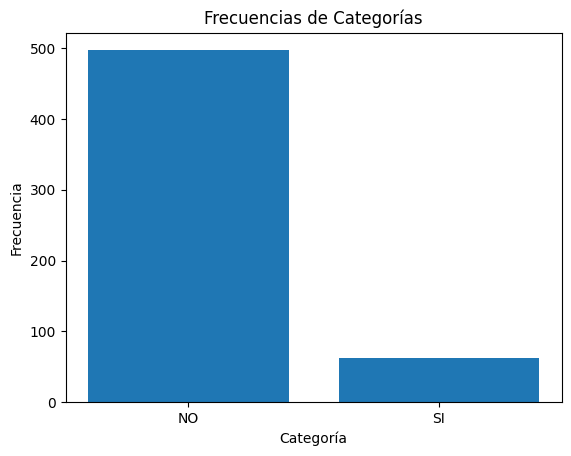

In [209]:
import matplotlib.pyplot as plt

# Contar las frecuencias de cada categoría
frecuencias_diabetes = data['DIABETES'].value_counts()

# Crear la visualización de barras
plt.bar(frecuencias_diabetes.index, frecuencias_diabetes.values)
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.title('Frecuencias de Categorías')
plt.show()


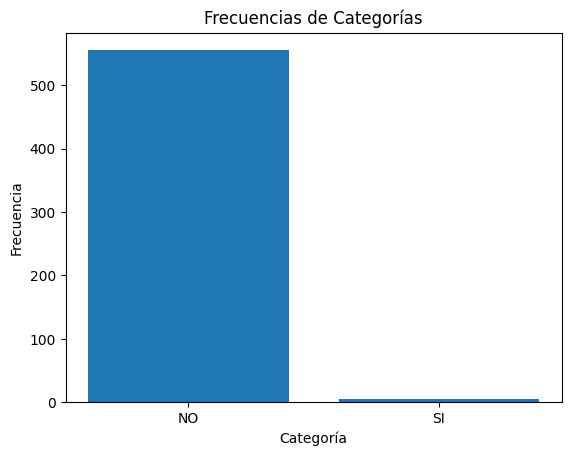

In [210]:
# Contar las frecuencias de cada categoría
frecuencias = data['HOSPITALIZACIÓN ULTIMO MES'].value_counts()

# Crear la visualización de barras
plt.bar(frecuencias.index, frecuencias.values)
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.title('Frecuencias de Categorías')
plt.show()

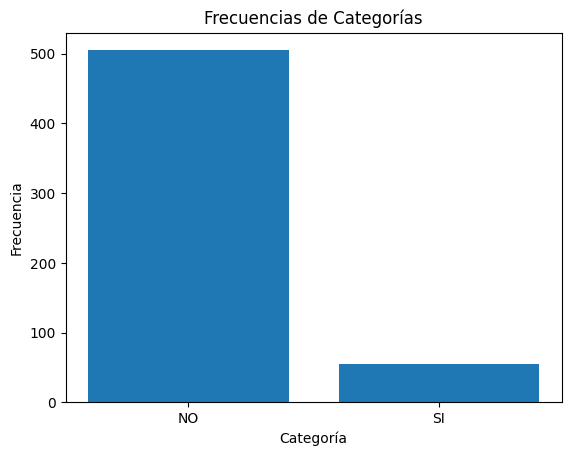

In [211]:
# Contar las frecuencias de cada categoría
frecuencias = data['BIOPSIAS PREVIAS'].value_counts()

# Crear la visualización de barras
plt.bar(frecuencias.index, frecuencias.values)
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.title('Frecuencias de Categorías')
plt.show()

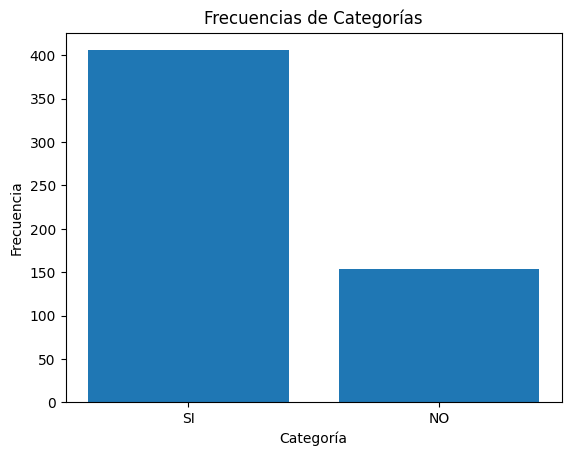

In [212]:
# Contar las frecuencias de cada categoría
frecuencias = data['VOLUMEN PROSTATICO'].value_counts()

# Crear la visualización de barras
plt.bar(frecuencias.index, frecuencias.values)
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.title('Frecuencias de Categorías')
plt.show()

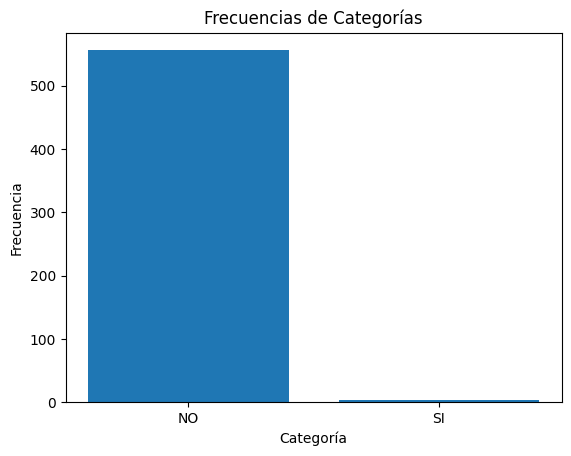

In [213]:
# Contar las frecuencias de cada categoría
frecuencias = data['CUP'].value_counts()

# Crear la visualización de barras
plt.bar(frecuencias.index, frecuencias.values)
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.title('Frecuencias de Categorías')
plt.show()

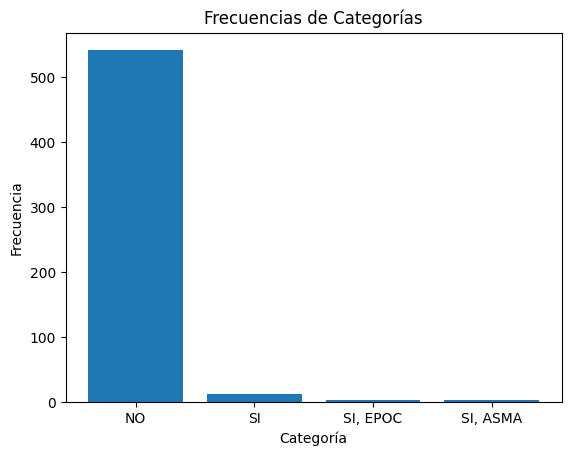

In [214]:
# Contar las frecuencias de cada categoría
frecuencias = data['ENF. CRONICA PULMONAR OBSTRUCTIVA'].value_counts()

# Crear la visualización de barras
plt.bar(frecuencias.index, frecuencias.values)
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.title('Frecuencias de Categorías')
plt.show()

In [215]:
##Pasaremos los SI, EPOC y los SI, ASMA a la categoria de SI
data["ENF. CRONICA PULMONAR OBSTRUCTIVA"] = data["ENF. CRONICA PULMONAR OBSTRUCTIVA"].replace('SI, EPOC', 'SI')
data["ENF. CRONICA PULMONAR OBSTRUCTIVA"] = data["ENF. CRONICA PULMONAR OBSTRUCTIVA"].replace('SI, ASMA', 'SI')

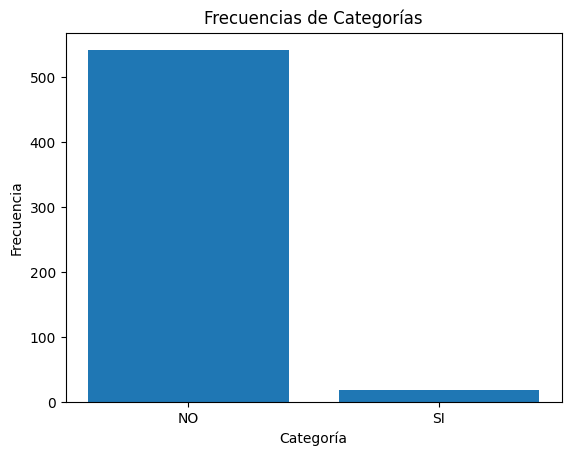

In [216]:
# Contar las frecuencias de cada categoría
frecuencias = data['ENF. CRONICA PULMONAR OBSTRUCTIVA'].value_counts()

# Crear la visualización de barras
plt.bar(frecuencias.index, frecuencias.values)
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.title('Frecuencias de Categorías')
plt.show()

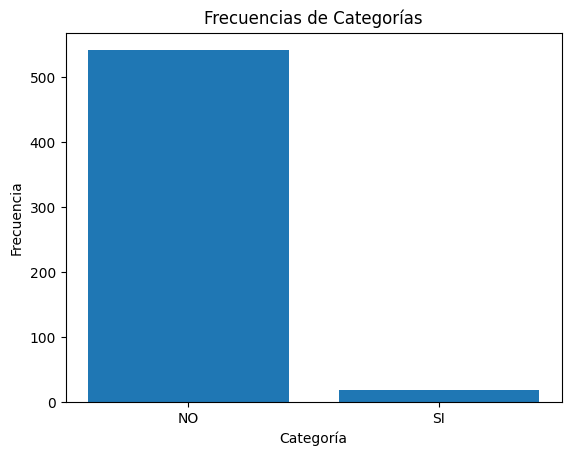

In [217]:
# Contar las frecuencias de cada categoría
frecuencias = data['ENF. CRONICA PULMONAR OBSTRUCTIVA'].value_counts()

# Crear la visualización de barras
plt.bar(frecuencias.index, frecuencias.values)
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.title('Frecuencias de Categorías')
plt.show()

Text(0.5, 1.0, 'Frecuencias de Categorías')

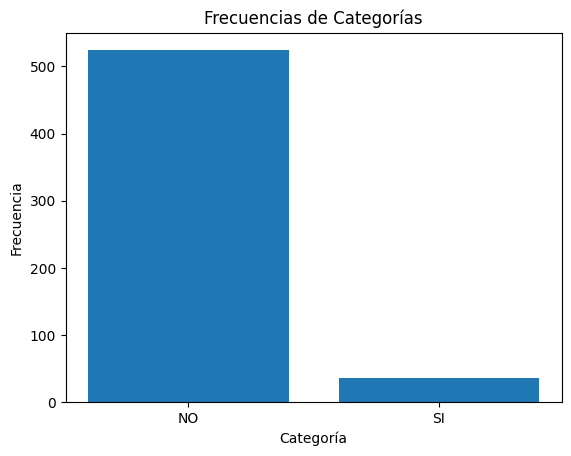

In [218]:
# Contar las frecuencias de cada categoría
frecuencias = data['FIEBRE'].value_counts()

# Crear la visualización de barras
plt.bar(frecuencias.index, frecuencias.values)
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.title('Frecuencias de Categorías')

Text(0.5, 1.0, 'Frecuencias de Categorías')

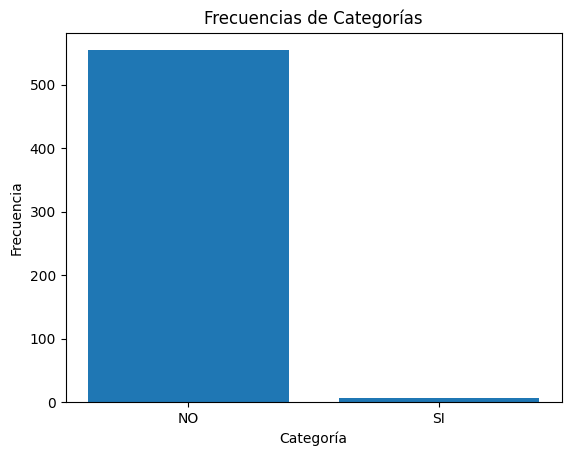

In [219]:
# Contar las frecuencias de cada categoría
frecuencias = data['ITU'].value_counts()

# Crear la visualización de barras
plt.bar(frecuencias.index, frecuencias.values)
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.title('Frecuencias de Categorías')

Text(0.5, 1.0, 'Frecuencias de Categorías')

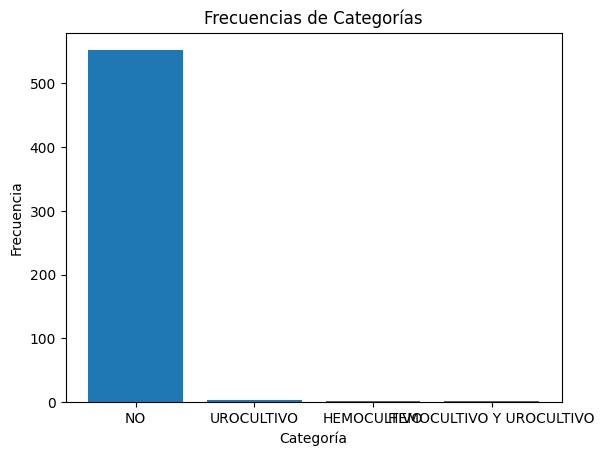

In [220]:
# Contar las frecuencias de cada categoría
frecuencias = data['TIPO DE CULTIVO'].value_counts()

# Crear la visualización de barras
plt.bar(frecuencias.index, frecuencias.values)
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.title('Frecuencias de Categorías')

Text(0.5, 1.0, 'Frecuencias de Categorías')

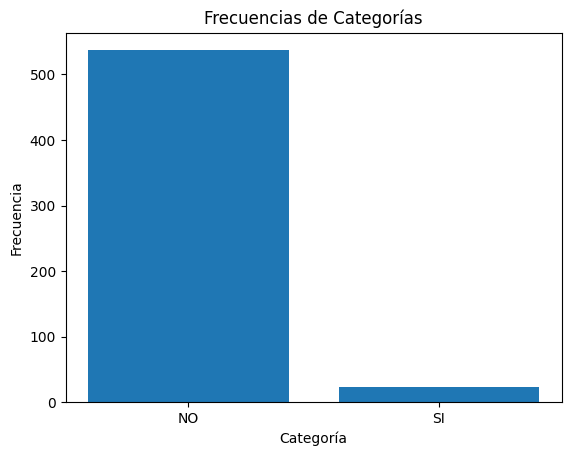

In [221]:
# Contar las frecuencias de cada categoría
frecuencias = data['HOSPITALIZACION'].value_counts()

# Crear la visualización de barras
plt.bar(frecuencias.index, frecuencias.values)
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.title('Frecuencias de Categorías')

Revisen la cantidad de nulos que tiene cada columna. ¿Es necesario eliminar alguna columna? ¿Se imputarán valores? En caso de imputar, explicar en cada caso, por medio de qué estrategia lo harán. 

In [222]:
#Ya esta realizado anteriormente.

Para el caso de las variables numéricas, ¿Es necesario normalizar?

Text(0.5, 1.0, 'Frecuencias de Cantidad')

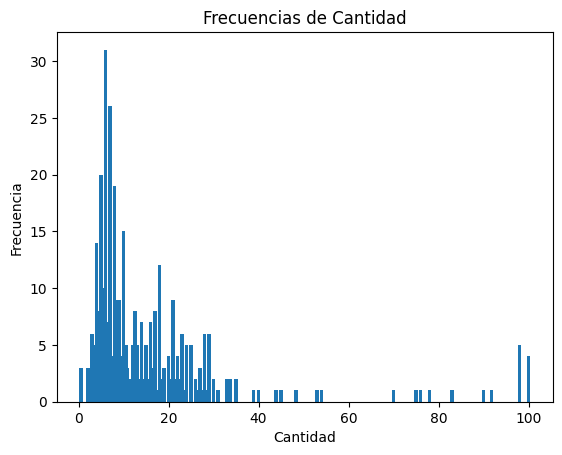

In [223]:
# Vizualizaremos los valores de PSA
frecuencias = data['PSA'].value_counts()

# Crear la visualización de barras
plt.bar(frecuencias.index, frecuencias.values)
plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')
plt.title('Frecuencias de Cantidad')

In [224]:
#No se que criterio tomar con esta variable.

Realice las transformaciones que considere pertinentes con el fin de preparar los datos para un modelo de clasificación de un paciente con desenlace en Hospitalización. 

In [225]:
#data = data.drop(['PSA_Normalizada_minMax',"PSA_normalizada"], axis=1)

In [226]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 560 entries, 0 to 567
Data columns (total 20 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   EDAD                                                                        560 non-null    int32  
 1   DIABETES                                                                    560 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                  560 non-null    object 
 3   PSA                                                                         560 non-null    float64
 4   BIOPSIAS PREVIAS                                                            560 non-null    object 
 5   VOLUMEN PROSTATICO                                                          560 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                

In [227]:
data = data.drop("NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA", axis=1)

In [228]:
data = data.rename(columns={'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA\t': 'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'})

In [229]:
data

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,FIEBRE,ITU,TIPO DE CULTIVO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA
0,53,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,SI,NO,NO,NO,SI,2,0,1
1,56,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,SI,NO,NO,NO,SI,5,0,1
2,57,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,NEG,SI,NO,HEMOCULTIVO,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4,3,1
3,56,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,SI,NO,NO,NO,SI,5,0,1
4,55,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,NEG,SI,NO,HEMOCULTIVO,NO,SI,4,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,78,NO,NO,9.3,NO,SI,CEFALOSPORINA_AMINOGLUCOCIDO,12,NO,NO,NEG,NO,NO,NO,NO,NO,0,0,0
563,67,NO,NO,6.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,ADENOCARCINOMA GLEASON 6,NO,NO,NO,NO,NO,0,0,0
564,64,NO,NO,4.8,NO,SI,OTROS,12,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,0,0,0
566,67,NO,NO,8.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,0,0,0


In [230]:
#Vamos a cambiar el nombre de las columnas
data = data.rename(columns={"EDAD": "Edad", "DIABETES": "Diabetes", "HOSPITALIZACIÓN ULTIMO MES": "Hospitalizacion ultimo mes", "BIOPSIAS PREVIAS": "Biopsias previas", "VOLUMEN PROSTATICO": "Volumen prostatico", "ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS": "Antibiotico utilizado en la profilaxis", "NUMERO DE MUESTRAS TOMADAS": "Numero de muestras tomadas", "ENF. CRONICA PULMONAR OBSTRUCTIVA": "Enf. cronica pulmonar", "BIOPSIA": "Biopsia", "FIEBRE": "Fiebre", "TIPO DE CULTIVO": "Tipo de cultivo", "PATRON DE RESISTENCIA": "Patron de resistencia", "HOSPITALIZACION": "Hospitalizacion", "DIAS HOSPITALIZACION MQ": "Dias hospitalizacion MQ", "DIAS HOSPITALIZACIÓN UPC": "Dias hospitalizacion UPC", "NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA": "Num dias post biopsia en que se presenta la infeccion"})

In [231]:
data.head(1)

,Edad,Diabetes,Hospitalizacion ultimo mes,PSA,Biopsias previas,Volumen prostatico,Antibiotico utilizado en la profilaxis,Numero de muestras tomadas,CUP,Enf. cronica pulmonar,Biopsia,Fiebre,ITU,Tipo de cultivo,Patron de resistencia,Hospitalizacion,Dias hospitalizacion MQ,Dias hospitalizacion UPC,Num dias post biopsia en que se presenta la infeccion
0,53,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,SI,NO,NO,NO,SI,2,0,1


Voy a hacer mas cambios al dataframe para preparar los datos.

In [232]:
#Pasamos las variables a 1 y 0 para categorizar
columnas_seleccionadas = ["Diabetes", "Hospitalizacion ultimo mes", "Biopsias previas", "Volumen prostatico", "CUP", "Enf. cronica pulmonar", "Fiebre", "ITU", "Hospitalizacion"]

for columna in columnas_seleccionadas:
    data[columna] = data[columna].replace({'SI': 1, 'NO': 0})

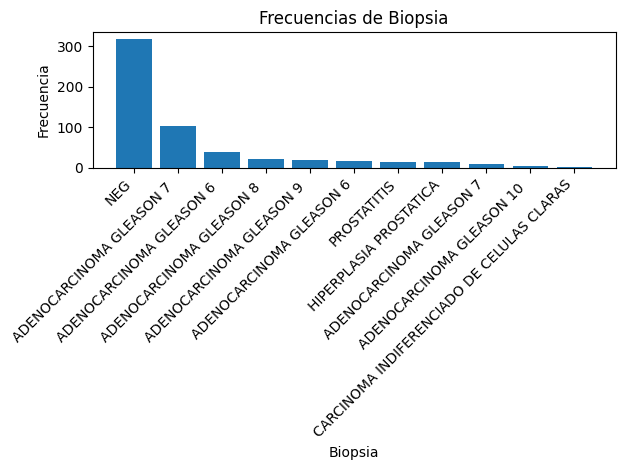

In [233]:
import matplotlib.pyplot as plt

# Vizualizaremos los valores de 'Biopsia'
frecuencias = data['Biopsia'].value_counts()

# Crear la visualización de barras
plt.bar(frecuencias.index, frecuencias.values)
plt.xlabel('Biopsia')
plt.ylabel('Frecuencia')
plt.title('Frecuencias de Biopsia')

# Rotar los títulos del eje x para mejorar la legibilidad
plt.xticks(rotation=45, ha='right')  # 'ha' ajusta la alineación del texto

plt.tight_layout()  # Ajusta el diseño para evitar superposiciones
plt.show()

In [234]:
#Vemos los valores distintos de Biopsia
distinct_values_numPostBio = data["Biopsia"].unique()
print(distinct_values_numPostBio)

['NEG' 'ADENOCARCINOMA GLEASON 6 ' 'ADENOCARCINOMA GLEASON 7 '
 'ADENOCARCINOMA GLEASON 6' 'ADENOCARCINOMA GLEASON 10 '
 'ADENOCARCINOMA GLEASON 9 ' 'ADENOCARCINOMA GLEASON 8 ' 'PROSTATITIS'
 'ADENOCARCINOMA GLEASON 7' 'HIPERPLASIA PROSTATICA'
 'CARCINOMA INDIFERENCIADO DE CELULAS CLARAS']


In [235]:
#Cambiamos en la columna biopsia los valores para hacerla categorica.
variablesBiopsia = ['ADENOCARCINOMA GLEASON 6 ', 'ADENOCARCINOMA GLEASON 7 ',
 'ADENOCARCINOMA GLEASON 6', 'ADENOCARCINOMA GLEASON 10 ',
 'ADENOCARCINOMA GLEASON 9 ', 'ADENOCARCINOMA GLEASON 8 ', 'PROSTATITIS',
 'ADENOCARCINOMA GLEASON 7', 'HIPERPLASIA PROSTATICA',
 'CARCINOMA INDIFERENCIADO DE CELULAS CLARAS']
for variable in variablesBiopsia:
    data["Biopsia"] = data["Biopsia"].replace({variable: 1, 'NEG': 0})

Text(0.5, 1.0, 'Frecuencias de Cantidad')

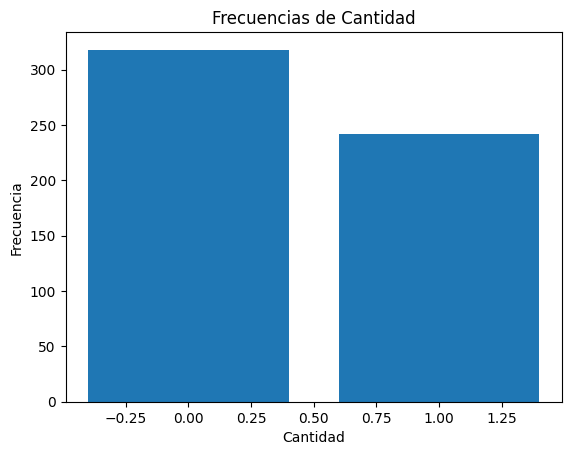

In [236]:
# Vizualizaremos los valores de 'Biopsia'
frecuencias = data['Biopsia'].value_counts()

# Crear la visualización de barras
plt.bar(frecuencias.index, frecuencias.values)
plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')
plt.title('Frecuencias de Cantidad')

In [237]:
#Borrar "Antibiotico utilizado en la profilaxis" porque tiene muchos valores diferentes para ser categoria

data = data.drop('Antibiotico utilizado en la profilaxis', axis=1)

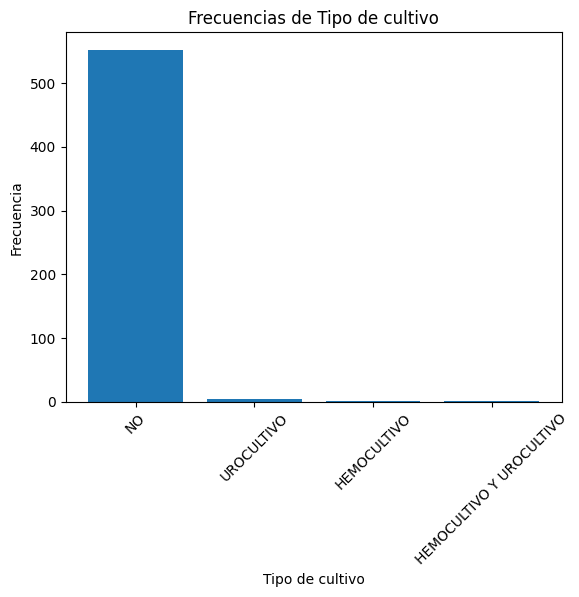

In [238]:
import matplotlib.pyplot as plt

# Vizualizaremos los valores de 'Tipo de cultivo'
frecuencias = data['Tipo de cultivo'].value_counts()

# Crear la visualización de barras
plt.bar(frecuencias.index, frecuencias.values)
plt.xlabel('Tipo de cultivo')
plt.ylabel('Frecuencia')
plt.title('Frecuencias de Tipo de cultivo')

# Rotar los títulos del eje x para mejorar la legibilidad
plt.xticks(rotation=45)

plt.show()

In [239]:
#Vemos los valores distintos de 'Tipo de cultivo'
distinct_values_numPostBio = data['Tipo de cultivo'].unique()
print(distinct_values_numPostBio)

['NO' 'HEMOCULTIVO' 'UROCULTIVO' 'HEMOCULTIVO Y UROCULTIVO']


In [240]:
#Cambiamos en la columna 'Tipo de cultivo' los valores para hacerla categorica.
variables = ['HEMOCULTIVO', 'UROCULTIVO', 'HEMOCULTIVO Y UROCULTIVO']
for variable in variables:
    data['Tipo de cultivo'] = data['Tipo de cultivo'].replace({variable: 1, 'NO': 0})

Text(0.5, 1.0, 'Frecuencias de Cantidad')

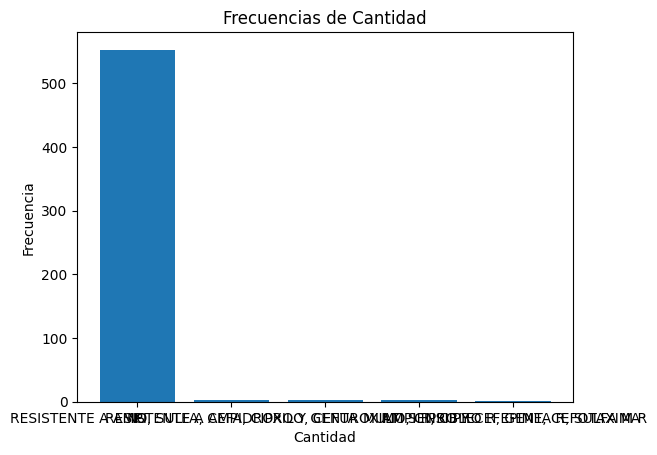

In [241]:
#Patron de resistencia	
# Vizualizaremos los valores de 'Patron de resistencia'
frecuencias = data['Patron de resistencia'].value_counts()

# Crear la visualización de barras
plt.bar(frecuencias.index, frecuencias.values)
plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')
plt.title('Frecuencias de Cantidad')

In [242]:
#Vemos los valores distintos de 'Patron de resistencia'
distinct_values = data['Patron de resistencia'].unique()
print(distinct_values)

['NO' ' AMPI R, CIPRO R, GENTA R, SULFA M R'
 'RESISTENTE A AMPI, CIPRO Y GENTA'
 'RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA'
 'MULTI SENSIBLE']


In [243]:
#Cambiamos en la columna 'Tipo de cultivo' los valores para hacerla categorica.
variables = [' AMPI R, CIPRO R, GENTA R, SULFA M R',
 'RESISTENTE A AMPI, CIPRO Y GENTA',
 'RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA',
 'MULTI SENSIBLE']
for variable in variables:
    data['Patron de resistencia'] = data['Patron de resistencia'].replace({variable: 1, 'NO': 0})

In [244]:
#Con todos los valores pasados a tipo numerico vamos a elegir las variables para ser X y nuesta variable objetivo y

Matriz de correlación con heatmap

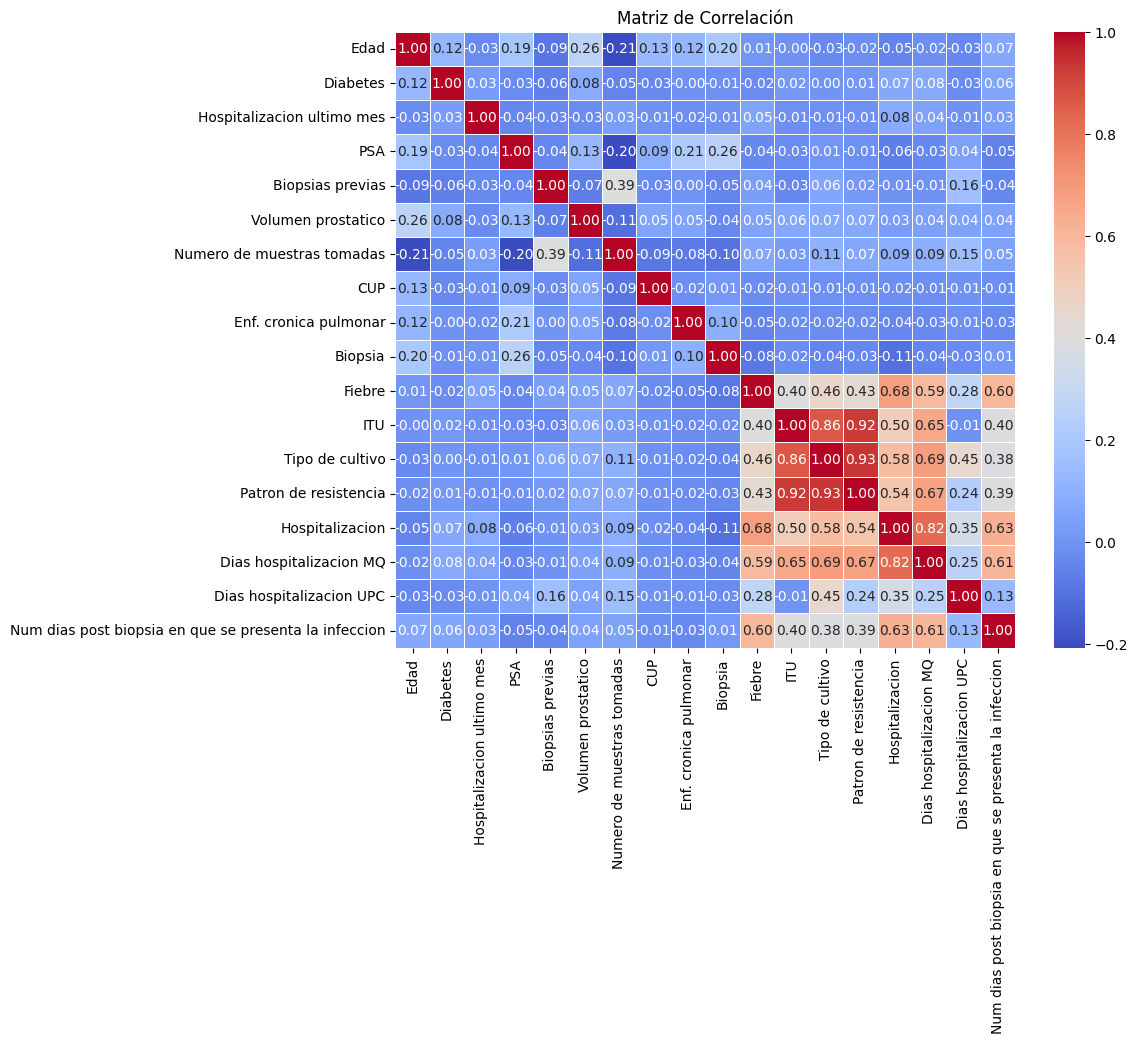

In [245]:
# import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la matriz de correlación
matriz_correlacion = data.corr()

# Crear el mapa de calor
plt.figure(figsize=(10, 8))  # Tamaño del gráfico
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()


Exporte la base de datos preparada en un archivo .csv para el modelamiento. 

In [246]:
# Exportar el DataFrame a un archivo CSV
data.to_csv('BBDD_Hospitalización_CSV_José.csv', index=False)